<a href="https://colab.research.google.com/github/luislauriano/data_science/blob/master/Analisando_dados_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise dos Dados do Airbnb - Rio de Janeiro**

O Airbnb vem sendo considerado como a **maior empresa hoteleira da atualidade**, com este grande crescimento deve ser uma empresa que possui muitos hoteis, não, a empresa hoteleira possui **nenhum hotel**. Essa empresa funciona buscando conectar pessoas que buscam um local para se hospedar em uma viagem com aquelas que podem oferecer uma hospedagem em troca de diárias.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo, para nós do Brasil, são disponibilizados dados apenas da cidade do Rio de Janeiro. Através do portal [Inside Airbnb](https://http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

>Em periodo de carnaval e finais de ano, a rede hoteleira do Rio tem um grande crescimento, para 2020 a projeção é que a rede hoteleira carioca tenha 100% dos leitos ocupados durante o evento. Dados atuais da Hotéis Rio 
apontam que os hotéis da Barra da Tijuca e São Conrado registram 84% de ocupação, seguidos de Ipanema e Leblon com 80%, Leme e Copacabana com 78%, Botafogo e Flamengo com 89% e o Centro do Rio chegando a 83%.

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**




#**Obtenção de Dados**

In [0]:
#importar os pacotes necessarios 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sea 

%matplotlib inline 

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-07-15/visualisations/listings.csv")

#**Análise dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados

**Dicionário das variáveis**

>* id - Numero gerado como identificador do Imóvel
>* name - Nome da propriedade do anunciante
>* host_id - Nome do anfitrião
>* neighbourhood_group - Coluna sem valor válido
>* neighbourhood - Nome do bairro
>* latitude - Coordenada da latitude da propriedade
* longitude - Coordenada da longitude da propriedade
* room_type - Informa o tipo de quarto que é oferecido
* price - Preço para alugar o imóvel
* minimun_nights - Noites minimas para conseguir alugar o imóvel
* number_of_reviews - Número de reviews que o imóvel possui
* last_review - Data da última review
* reviews_per_month - Quantidade de reviews por mês
* calculate_host_listings_count - Quantidade de imóvel que o dono possui
* availibility_365 - Número de dias que o imóvel esta disponivel duranto o ano(365 dias)

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.


In [0]:
# mostrar as 5 primeiras entradas(para mais entradas, colocar o numero desejado dentro dos parenteses)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,296,4,233,2019-06-30,2.13,1,332
1,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,161,4,232,2019-04-27,2.09,3,352
2,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,243,2,260,2019-07-08,2.37,1,125
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,337,2,160,2019-07-04,2.29,1,122
4,35764,COPACABANA SEA BREEZE - RIO,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,221,3,303,2019-07-12,2.83,1,145


# **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

>Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa com 35847 entradas e 106 variáveis (listings.csv.gz).

In [0]:
#indentificar o volume de dados do DataFrame
print(f'Variaveis/Linhas: {df.shape[0]}')
print(f'Entradas/Colunas: {df.shape[1]}')

#verificar as 5 primeiras entradas do DataSet(verificar cada tipo de variavel)
display(df.dtypes)

Variaveis/Linhas: 35451
Entradas/Colunas: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#**Q2. Qual a porcentagem de valores ausentes no dataset?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [0]:
# ordenar em ordem descrescente as variáveis por seus valores ausentes
# a função sort_values serve para ordenar de forma crescente ou decrescente
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.464641
last_review                       0.464641
name                              0.001862
host_name                         0.001692
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

>* Nota-se que a coluna **neighbourhood_group** possui 100% dos seus valores faltantes.
* As variáveis **reviews_per_month** e **last_review** possuem valores nulos em quase metade das linhas.
* A variável **name** têm aproximadamente 0,1% dos valores nulos.
* A variável **host_name** têm aproximadamente 0,005% dos seus valores nulos.


# **Q3. Qual o tipo de distribuição das variáveis?**

Para verificar qual a distribuição das variáveis, irei plotar um histograma. Devido que com um gráfico de histograma fica mais fácil o entendimento e a visualização, neste caso. 

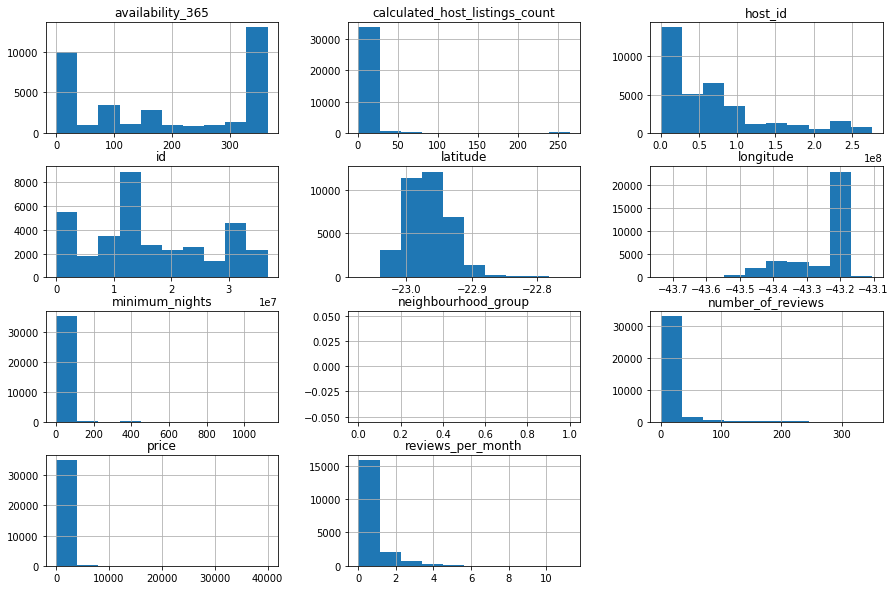

In [0]:
#plotar o histograma das variaveis numéricas
df.hist(bins=10, figsize=(15,10));


# **Q4. Há outliers presentes?**
Pela distribuição de alguns histogramas é possivel averiguar que existem alguns outliers. Se olharmos por exemplo as variáveis **price**, **minimum_nights** e **calculated_host_listnigs_count**

Perceba que os valores não seguem um distribuição e distorcem toda a representação gráfica. 
>Para confirmar isso exitem duas maneiras bem rapidas que auxiliam a detecção de outliers. São elas:

>* Resumo estatistico por meio do metodo describe()
>* Plotar Boxplot para à variável

In [0]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35451.000000,35451.000000,35451.000000,18979.000000,35451.000000,35451.000000
mean,622.242222,4.735833,7.951962,0.607775,7.884827,190.142648
std,1588.131281,21.958524,22.308053,0.849336,32.626366,151.889963
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,281.000000,2.000000,1.000000,0.230000,1.000000,179.000000
75%,599.000000,4.000000,5.000000,0.790000,2.000000,362.000000
max,40000.000000,1123.000000,350.000000,11.250000,265.000000,365.000000



Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

>* A variável price possui 75% do valor abaixo de 599, porém seu valor máximo é 40000.
* A quantidade mínima de noites (minimum_nights) está acima do limite real de 365 dias no ano.

**Boxplot para minimum_nights**

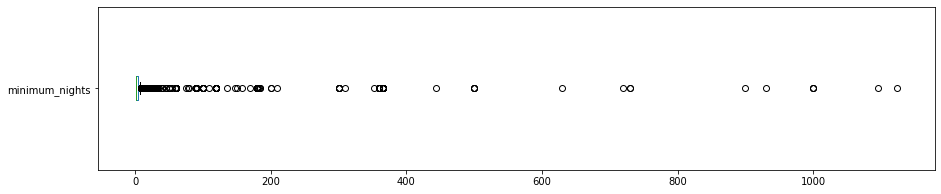

minimum_nights: valores acima de 30:
223 entradas
0.6290%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

**Boxplot para price**

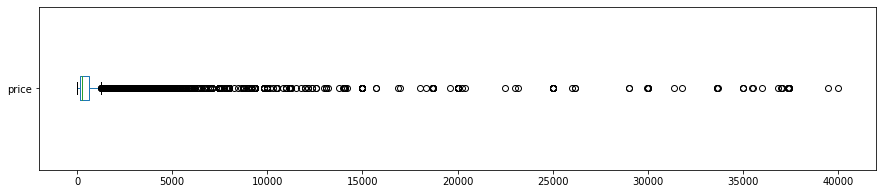


price: valores acima de 1500
2528 entradas
7.1310%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

**Histogramas sem outliers**

Já que identificamos outliers nas variáveis **price** e **minimum_nights**, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

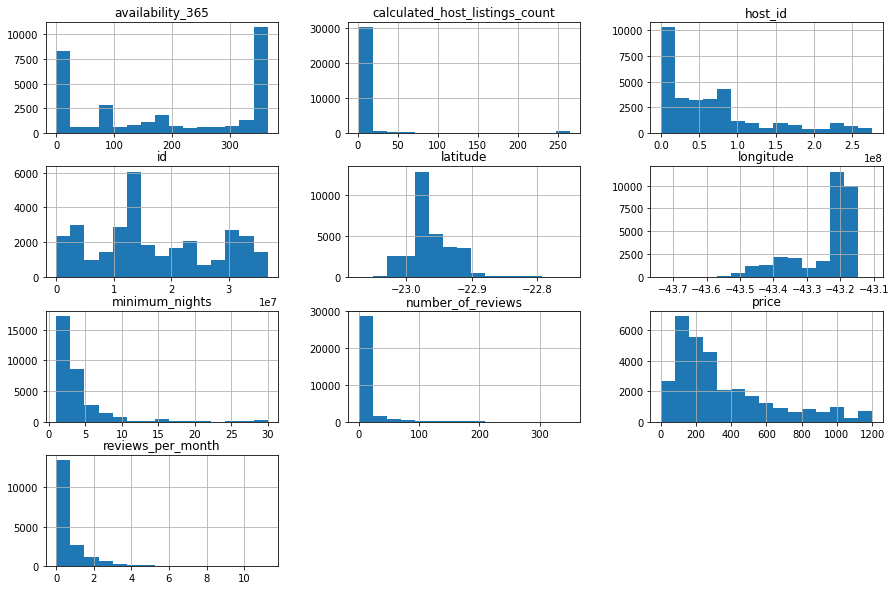

In [0]:
#remover outliers em um novo DataFrame.
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1200].index, axis=0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace = True)

#remover a coluna neighbourhood_group, pois esta vazia.
df_clean.drop('neighbourhood_group', axis=1, inplace = True)

#plotar o histograma novamente, agora de forma limpa.
df_clean.hist(bins=15, figsize=(15,10));



# **Q5. Qual a correlação existente entre as variaveis?**

Correlação significa que existe um relação entre duas ou mais coisas. No nosso contexto estamos buscando relação entre duas variáveis.

Essa relação pode ser medida e é função do coeficiente estabelecer qual a intensidade dela. 

>Podemos fazer isso atravez de:
>* Criar uma matriz de correlação.
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn.

In [0]:
#criar uma matriz de correlação com matrizes selecionadas 
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.173657,-0.159107,-0.172107,-0.015076,-0.016869
minimum_nights,0.173657,1.000000,-0.079743,-0.114248,-0.039289,-0.019287
number_of_reviews,-0.159107,-0.079743,1.000000,0.627411,-0.037577,0.010169
reviews_per_month,-0.172107,-0.114248,0.627411,1.000000,-0.019005,-0.048761
calculated_host_listings_count,-0.015076,-0.039289,-0.037577,-0.019005,1.000000,0.072012
availability_365,-0.016869,-0.019287,0.010169,-0.048761,0.072012,1.000000


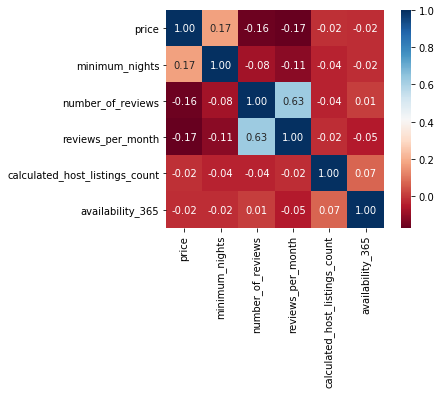

In [0]:
#utilizando a matriz gerada acima vamos plotar um heatmap.
 sea.heatmap(corr,cmap='RdBu', fmt='.2f', square='true', linecolor='white', annot=True);

# **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável **room_type** indica o tipo de locação que está anunciada no Airbnb. No site, existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Agora vamos analisar qual o tipo de imóvel mais alugado de acordo com as colunas **room_type** que indica o tipo de imóvel e usando o método **value_counts()** que nos diz quantas vezes houve a ocorrência.



In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    21658
Private room        9360
Shared room          840
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.679829
Private room       0.293804
Shared room        0.026367
Name: room_type, dtype: float64

# **Q6. Qual a localidade mais cara do Rio?**
Uma maneira de se verificar uma variável em função da outra é usando groupby(). 
>Neste caso, queremos comparar a entrada dos bairros **(neighbourhoods)** a partir da entrada do preço de locação **(price)**.

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Vaz Lobo                  967.000000
Ricardo de Albuquerque    605.750000
Deodoro                   474.500000
Jacarepaguá               466.830477
Barra da Tijuca           452.328502
Abolição                  452.200000
Leblon                    444.759539
Lagoa                     441.119658
Maracanã                  427.978339
Camorim                   424.823529
Name: price, dtype: float64

# **Qual a localidade mais barata do Rio de Janeiro?**


In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = True)[:10]

neighbourhood
Coelho Neto        48.500000
Vista Alegre       67.000000
Vila Kosmos        77.750000
Colégio            79.000000
Honório Gurgel     79.000000
Manguinhos         86.000000
Gericinó           91.500000
Maré              101.000000
Penha             103.529412
Padre Miguel      107.000000
Name: price, dtype: float64

Pudemos observar que o bairro Vaz Lobo lidera a lista dos bairros mais caros com uma média de 967 reais por dia, deixando para trás lugares como Barra da Tijuca e Leblon. Nota-se ainda que o bairro da Abolição está com uma faixa de preço maior do que a bairros mais nobres como o Leblon.  

>Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar.

Por outro lado, o bairro do Coelho Neto lidera os bairros com menores faixas de preço por locação, apresentando um valor de 48,5 reais por dia, uma diferença de mais de 900 reais comparado ao bairro Vaz lobo. 

Quando analisamos seja os bairros com maiores preços ou os bairros com menores preços, percebemos que ambos possuem uma localização afastada do centro da cidade do Rio de Janeiro, usando o Cristo Redentor como referência. O bairro Vaz Lobo que apresentou o maior preço de locação, obtêm uma distancia de aproximadamente 35 km do cristo redentor, enquanto, o bairro Coelho Neto de menor preço de locação, obtêm uma distancia de aproximadamente 36 km do cristo redentor. 

Essa distância das locações para o centro da cidade fica mais clara quando é feito um gráfico de dispersão.

>Como nos foi fornecido a longitude e latitude, podemos plotar um gráfico de dispersão através dessas variáveis determinando o eixo (x) para longitude e o eixo (y) para latitude. Observe:

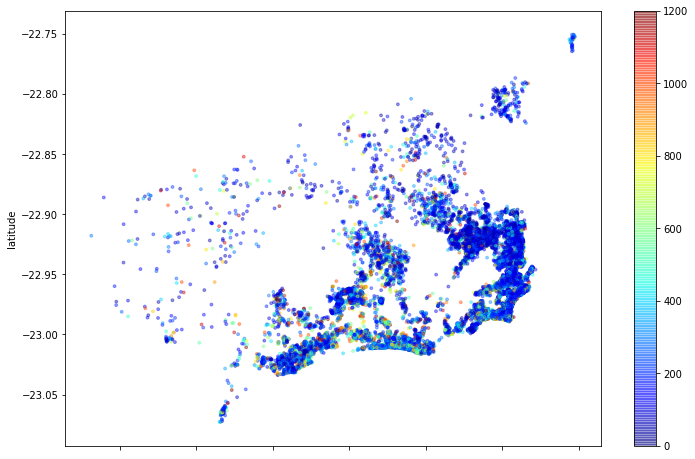

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


# **Conclusão**

>O objetivo foi fazer uma análise superficial dos dados do Airbnb do estado do Rio de Janeiro, porém com está análise já podemos observar a presença de outliers em algumas das variáveis, que impemdem uma análise estatística com maior precisão. 

>Conclui-se que seja os maiores ou menores preços, as locações em sua maioria estão focadas distantes do centro da cidade do Rio e famosos pontos turísticos, como Maracanã, Cristo Redentor e etc... Então é sempre bom ficar atento quanto a localização do imóvel que pretende ser alocado e o seu objetivo pessoal, tendo em vista, se for pra turismo, tem o custo da deslocação, tempo e claro o dinheiro. Também foi possivel observar que bairros não tão famosos estão com um maior número de locações do que bairros como o do Leblon. 

>Por fim lembre-se que o DataSet utilizado é resumido e oferece apenas uma visão superficial da situação, assim recomenda-se um análise com uma base de dados mais abrengente.

